# 日本の人口データ分析

In [1]:
import pandas as pd

## データの読み込み

In [2]:
files = pd.DataFrame([
    ("6801tjin.xls",1,1968),
    ("6901tjin.xls",1,1969),
    ("7001tjin.xls",1,1970),
    ("7101tjin.xls",1,1971),
    ("7201tjin.xls",1,1972),
    ("7301tjin.xls",1,1973),
    ("7401tjin.xls",1,1974),
    ("7501tjin.xls",1,1975),
    ("7601tjin.xls",1,1976),
    ("7701tjin.xls",1,1977),
    ("7801tjin.xls",1,1978),
    ("7901tjin.xls",1,1979),
    ("8001tjin.xls",2,1980),
    ("8101tjin.xls",2,1981),
    ("8201tjin.xls",2,1982),
    ("8301tjin.xls",2,1983),
    ("8401tjin.xls",2,1984),
    ("8501tjin.xls",2,1985),
    ("8601tjin.xls",2,1986),
    ("8701tjin.xls",2,1987),
    ("8801tjin.xls",2,1988),
    ("8901tjin.xls",2,1989),
    ("9001tjin.xls",2,1990),
    ("9101tjin.xls",2,1991),
    ("9201tjin.xls",2,1992),
    ("9301tjin.xls",2,1993),
    ("9401tjin.xls",3,1994),
    ("9501tjin.xls",3,1995),
    ("9601tjin.xls",3,1996),
    ("9701tjin.xls",3,1997),
    ("9801tjin.xls",3,1998),
    ("9901tjin.xls",3,1999),
    ("0001tjin.xls",3,2000),
    ("0101tjin.xls",3,2001),
    ("0201tjin.xls",3,2002),
    ("0301tjin.xls",3,2003),
    ("0401tjin.xls",3,2004),
    ("0501tjin.xls",3.5,2005),
    ("0601tjin.xls",3,2006),
    ("0701tjin.xls",3,2007),
    ("0801tjin.xls",3,2008),
    ("0901tjin.xls",3,2009),
    ("1001tjin.xls",3,2010),
    ("1101tjin.xls",3,2011),
    ("1201tjin.xls",3,2012),
    ("1301stjin.xls",4,2013),
    ("1401stjin.xls",4,2014),
    ("1501stjin.xls",4,2015),
    ("1601stjin.xls",4,2016),
    ("1701stjin.xls",4,2017),
    ("1801stjin.xls",4,2018),
    ("1901stjin.xls",4,2019),
    ("2001stjin.xls",4,2020),
],columns=["filename","type","year"]
)

In [3]:
import numpy as np
for i,f in files.iterrows():
    t = pd.read_excel("opendata/jp/{}".format(f.filename),header=3)
    if (f.type == 1):
        t.columns =["団体コード","都道府県名","男","女","計","世帯数"]
        t.insert(0,"年",f.year)
        t["出生者数"] = np.nan
        t["死亡者数"] = np.nan
        if (i == 0):
            pop = t
        else:
            pop = pd.concat([pop,t],ignore_index=True)
    elif (f.type == 3.5):
        t = t.iloc[:,[0,1,2,3,4,6,9,13]]
        t.columns =["団体コード","都道府県名","男","女","計","世帯数","出生者数","死亡者数"]
        t.insert(0,"年",f.year)
        pop = pd.concat([pop,t],ignore_index=True)
    elif (f.type == 2 or f.type == 3):
        t = t.iloc[:,[0,1,2,3,4,5,7,11]]
        t.columns =["団体コード","都道府県名","男","女","計","世帯数","出生者数","死亡者数"]
        t.insert(0,"年",f.year)
        pop = pd.concat([pop,t],ignore_index=True)
    else:
        t = t.iloc[:,[0,1,2,3,4,5,9,15]]
        t.columns =["団体コード","都道府県名","男","女","計","世帯数","出生者数","死亡者数"]
        t.insert(0,"年",f.year)
        pop = pd.concat([pop,t],ignore_index=True)

In [4]:
pop.head()

,年,団体コード,都道府県名,男,女,計,世帯数,出生者数,死亡者数
0,1968,NaN,合計,50361080,51626940,101988020,27115293,NaN,NaN
1,1968,10006.0,北海道,2693169,2698688,5391857,1369907,NaN,NaN
2,1968,20001.0,青森県,740379,766146,1506525,345956,NaN,NaN
3,1968,30007.0,岩手県,706404,740428,1446832,328157,NaN,NaN
4,1968,40002.0,宮城県,893165,926068,1819233,423670,NaN,NaN


## 全国データ

In [5]:
pop_all = pop.loc[pop["都道府県名"]=="合計"].reset_index().drop(["index","団体コード","都道府県名"],axis=1)

In [6]:
pop_all.tail()

,年,男,女,計,世帯数,出生者数,死亡者数
48,2016,62464685,65601526,128066211,56950757,1024041.0,1302840.0
49,2017,62394275,65512811,127907086,57477037,997781.0,1316305.0
50,2018,62298889,65408370,127707259,58007536,964690.0,1347710.0
51,2019,62174142,65269421,127443563,58527117,937542.0,1370751.0
52,2020,62036028,65102005,127138033,59071519,884767.0,1386212.0


## 前年データを追加

In [7]:
pop_all["計前年差異"] = pop_all["計"].diff()
pop_all["男前年差異"] = pop_all["男"].diff()
pop_all["女前年差異"] = pop_all["女"].diff()

In [8]:
pop_all["計前年比"] = pop_all["計"].diff()
pop_all["男前年比"] = pop_all["男"].diff()
pop_all["女前年比"] = pop_all["女"].diff()

In [9]:
pop_all.head()

,年,男,女,計,世帯数,出生者数,死亡者数,計前年差異,男前年差異,女前年差異,計前年比,男前年比,女前年比
0,1968,50361080,51626940,101988020,27115293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1969,50731717,52015557,102747274,28205976,NaN,NaN,759254.0,370637.0,388617.0,759254.0,370637.0,388617.0
2,1970,51075492,52446420,103521912,29146288,NaN,NaN,774638.0,343775.0,430863.0,774638.0,343775.0,430863.0
3,1971,51574398,52965282,104539680,30027454,NaN,NaN,1017768.0,498906.0,518862.0,1017768.0,498906.0,518862.0
4,1972,52234442,53620077,105854519,30853005,NaN,NaN,1314839.0,660044.0,654795.0,1314839.0,660044.0,654795.0


## 描画

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


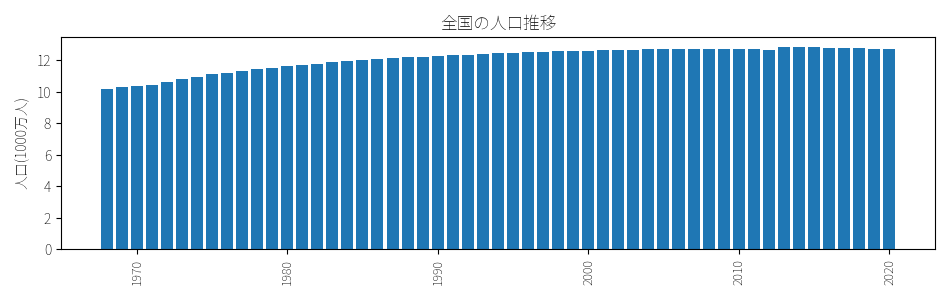

In [11]:
fig = plt.figure(figsize=(9.5,3))
#plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("全国の人口推移")
plt.xticks(rotation="90",fontsize=9)
plt.bar(pop_all["年"], pop_all["計"]/1000/1000/10)
plt.ylabel("人口(1000万人)")
plt.tight_layout()

<IPython.core.display.Javascript object>


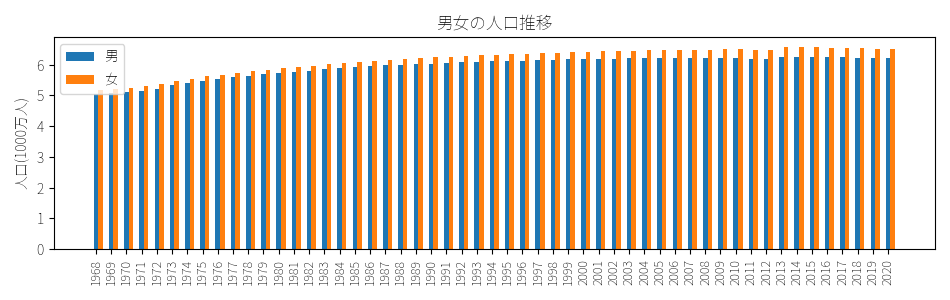

In [12]:
fig = plt.figure(figsize=(9.5,3))
#plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("男女の人口推移")
plt.xticks(rotation="90",fontsize=9)
width=0.3
plt.bar(pop_all["年"], pop_all["男"]/1000/1000/10,width=width,align="center",label="男")
plt.bar(pop_all["年"]+width, pop_all["女"]/1000/1000/10,width=width,align="center",label="女")
plt.xticks(pop_all["年"])
plt.ylabel("人口(1000万人)")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


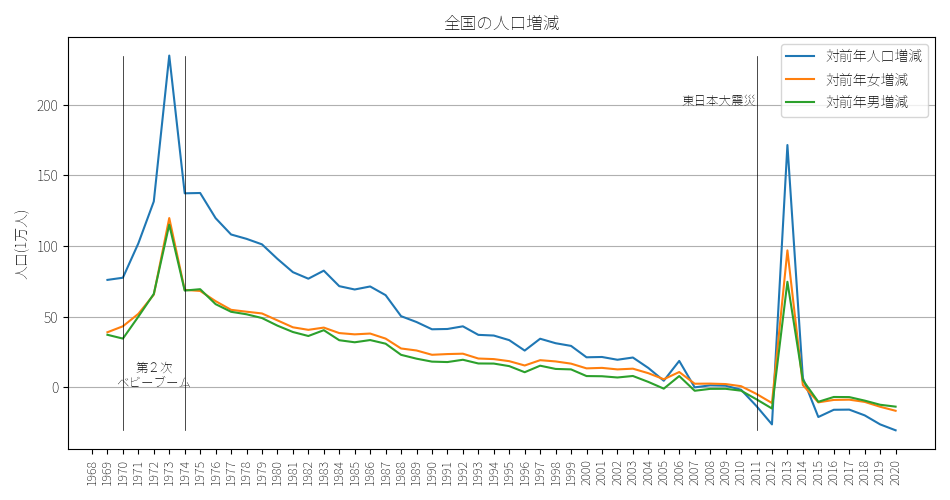

In [36]:
fig = plt.figure(figsize=(9.5,5))
#plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("全国の人口増減")
plt.xticks(rotation="90",fontsize=9)
plt.plot(pop_all["年"], pop_all["計前年差異"]/10000,label="対前年人口増減")
plt.plot(pop_all["年"], pop_all["女前年差異"]/10000,label="対前年女増減")
plt.plot(pop_all["年"], pop_all["男前年差異"]/10000,label="対前年男増減")
plt.plot([1970,1970],[pop_all["計前年差異"].min()/10000,pop_all["計前年差異"].max()/10000],"k-",lw=0.5)
plt.plot([1974,1974],[pop_all["計前年差異"].min()/10000,pop_all["計前年差異"].max()/10000],"k-",lw=0.5)
plt.text(1972,0,"第２次\nベビーブーム",fontsize=9,ha="center")
plt.plot([2011,2011],[pop_all["計前年差異"].min()/10000,pop_all["計前年差異"].max()/10000],"k-",lw=0.5)
plt.text(2011,200,"東日本大震災",fontsize=9,ha="right")
plt.xticks(pop_all["年"])
plt.ylabel("人口(1万人)")
plt.grid(axis="y")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


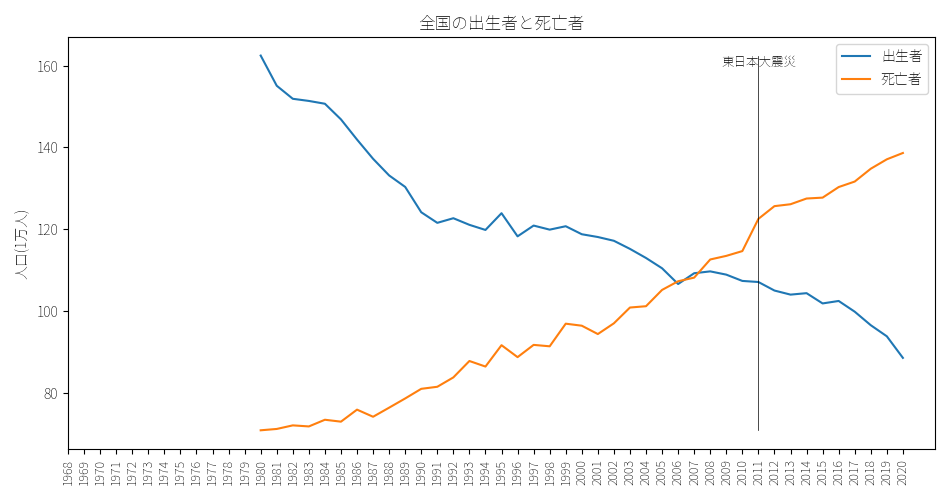

In [39]:
fig = plt.figure(figsize=(9.5,5))
#plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("全国の出生者と死亡者")
plt.xticks(rotation="90",fontsize=9)
plt.plot(pop_all["年"], pop_all["出生者数"]/10000,label="出生者")
plt.plot(pop_all["年"], pop_all["死亡者数"]/10000,label="死亡者")
plt.plot([2011,2011],[pop_all["死亡者数"].min()/10000,pop_all["出生者数"].max()/10000],"k-",lw=0.5)
plt.text(2011,160,"東日本大震災",fontsize=9,ha="center")
plt.xticks(pop_all["年"])
plt.ylabel("人口(1万人)")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


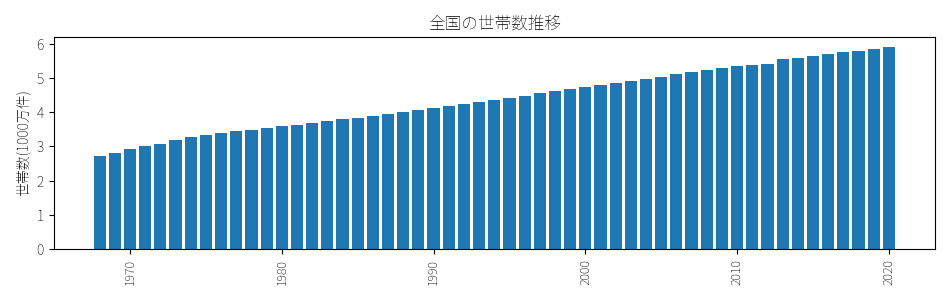

In [15]:
fig = plt.figure(figsize=(9.5,3))
#plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("全国の世帯数推移")
plt.xticks(rotation="90",fontsize=9)
plt.bar(pop_all["年"], pop_all["世帯数"]/1000/1000/10)
plt.ylabel("世帯数(1000万件)")
plt.tight_layout()

<IPython.core.display.Javascript object>


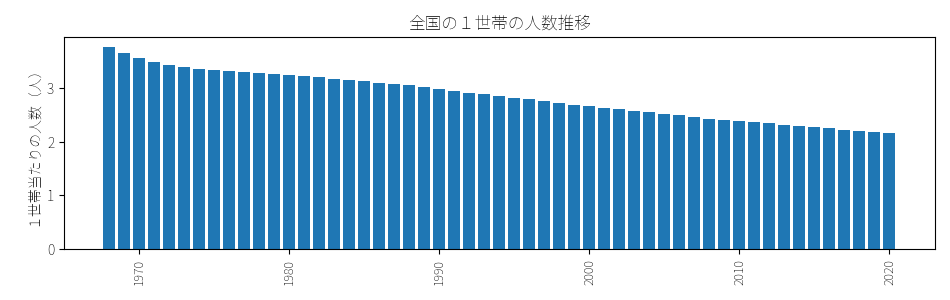

In [16]:
fig = plt.figure(figsize=(9.5,3))
#plt.subplot(1,1,1) # (rows, columns, panel number)
plt.title("全国の１世帯の人数推移")
plt.xticks(rotation="90",fontsize=9)
plt.bar(pop_all["年"], pop_all["計"] / pop_all["世帯数"])
plt.ylabel("１世帯当たりの人数（人）")
plt.tight_layout()